In [1]:
#no ejecutar

#import os
#import cv2
#import face_recognition

# Carpeta de entrada con las imágenes
#input_dir = 'D:\\ustral\\MCD\\DMA\\otos\\15FOTOS90'

# Carpeta de salida para guardar los rostros recortados
#output_dir = 'D:\\ustral\\MCD\\DMA\\otos\\FOTOS90'

# Load the face detector
#face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Process each image in the input directory
#for filename in os.listdir(input_dir):
    # Load the input image
    #input_path = os.path.join(input_dir, filename)
    #img = cv2.imread(input_path)

    # Detect faces in the image
    #face_locations = face_recognition.face_locations(img)

    # Crop the face(s) and save the result
    #for (top, right, bottom, left) in face_locations:
        #face = img[top:bottom, left:right]
        #face = cv2.resize(face, (90, 90))
        #face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY) ##COLOR_RGB2GRAY probar

        # Save the cropped face to the output directory
        #output_path = os.path.join(output_dir, f"{filename.split('.')[0]}_90.jpg")
        #cv2.imwrite(output_path, face)

In [9]:
import numpy as np
import cv2
import os
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
import glob
import math
import matplotlib.pyplot as plt
from mlxtend.preprocessing import standardize

input_dir2 = './train_/'

train_img = []
train_label = []
train_label_num = []
labels_unicos_num = []
labels_unicos_texto = []

cont = 0
cant = 0
labels_unicos_texto.append("ad_")
labels_unicos_num.append(cont)
for filename in os.listdir(input_dir2):
    temp = filename[0:3]
    cant += 1
    input_path = os.path.join(input_dir2, filename)
    if (cant > 1):
        if (filename[0:3] != train_label[-1]):
            cont += 1
            labels_unicos_texto.append(filename[0:3])
            labels_unicos_num.append(cont)
    train_label.append(filename[0:3])
    train_label_num.append(cont)
    img = cv2.imread(input_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_img.append(img)

train_img_array = np.array(train_img)
#train_label_num.append(22)

print(train_img_array.shape)

print(train_label)

print(len(train_label))

print(train_label_num)

print(len(train_label_num))

print(labels_unicos_num)

print(labels_unicos_texto)



OSError: [WinError 123] El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos: 'https://github.com/ephilipp84/NuestrasCaras/tree/main/train_'

In [3]:
input_dir2 = input_dir2 = './test_/'

test_img = []
test_label = []
test_label_num = []


cont = 0
cant = 0
for filename in os.listdir(input_dir2):
    temp = filename[0:3]
    cant += 1
    input_path = os.path.join(input_dir2, filename)
    if (cant > 1):
        if (filename[0:3] != test_label[-1]):
            cont += 1
    test_label.append(filename[0:3])
    test_label_num.append(cont)
    img = cv2.imread(input_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    test_img.append(img)

#test_label_num.append(22)
test_img_array = np.array(test_img)

print(test_img_array.shape)

print(test_label)

print(len(test_label))

print(test_label_num)

print(len(test_label_num))

(69, 90, 90)
['ad_', 'ad_', 'ad_', 'cp_', 'cp_', 'cp_', 'dl_', 'dl_', 'dl_', 'ec_', 'ec_', 'ec_', 'ep_', 'ep_', 'ep_', 'hg_', 'hg_', 'hg_', 'ja_', 'ja_', 'ja_', 'jm_', 'jm_', 'jm_', 'lm_', 'lm_', 'lm_', 'mf_', 'mf_', 'mf_', 'mg_', 'mg_', 'mg_', 'mk_', 'mk_', 'mk_', 'ml_', 'ml_', 'ml_', 'mp_', 'mp_', 'mp_', 'mru', 'mru', 'mru', 'mr_', 'mr_', 'mr_', 'mt_', 'mt_', 'mt_', 'ndl', 'ndl', 'ndl', 'ob_', 'ob_', 'ob_', 'rb_', 'rb_', 'rb_', 're_', 're_', 're_', 'sp_', 'sp_', 'sp_', 'ss_', 'ss_', 'ss_']
69
[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22]
69


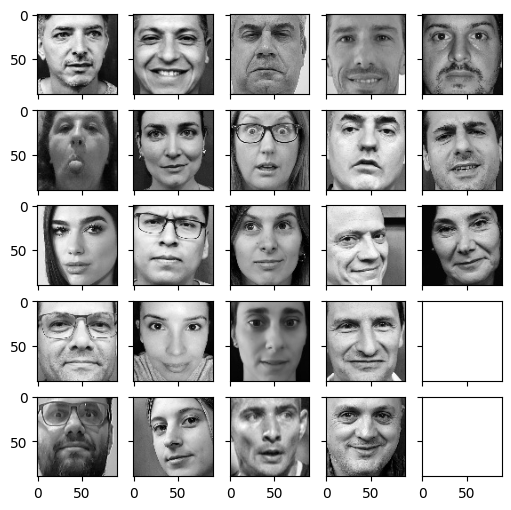

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(6,6))
for i in range(23):  
    axes[i%5][i//5].imshow(train_img_array[((i*15)+6),:,:], cmap='gray')
plt.show()

In [5]:
temp = []

for i in range(len(train_label)):  
    temp.append(train_img_array[i,:,:].flatten())

train_img_array_flatten = np.array(temp)

print(train_img_array_flatten.shape)


temp = []

for i in range(len(test_label)):  
    temp.append(test_img_array[i,:,:].flatten())

test_img_array_flatten = np.array(temp)

print(test_img_array_flatten.shape)

(345, 8100)
(69, 8100)


In [6]:
# Change integers to 32-bit floating point numbers
train_img_array_flatten = train_img_array_flatten.astype('float64')

train_img_array_flatten = train_img_array_flatten/255.0

# Change integers to 32-bit floating point numbers
test_img_array_flatten = test_img_array_flatten.astype('float64')

test_img_array_flatten = test_img_array_flatten/255.0




In [8]:
pca = PCA(n_components=.9, svd_solver = 'full')
pca.fit(train_img_array_flatten)

print(f'Nro de componentes a utilizar en el PCA : {pca.n_components_}')

Nro de componentes a utilizar en el PCA : 97


(97, 8100)


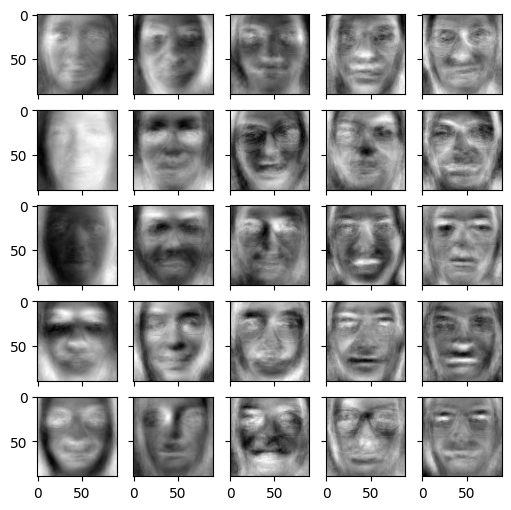

In [9]:

eigenfaces = pca.components_[:pca.n_components_]

print(eigenfaces.shape)
 
fig, axes = plt.subplots(5,5,sharex=True,sharey=True,figsize=(6,6))
for i in range(25):  
    axes[i%5][i//5].imshow(eigenfaces[i].reshape(90,90), cmap="gray")
plt.show()



In [10]:
train_pca = pca.transform(train_img_array_flatten)
test_pca = pca.transform(test_img_array_flatten)


print(f'train_img shape : {train_pca.shape}')
print(f'test_img shape : {test_pca.shape}')

train_img shape : (345, 97)
test_img shape : (69, 97)


In [32]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(test_pca.shape[1],)))

#model.add(keras.layers.Dense(59, activation='sigmoid'))

model.add(keras.layers.Dense(64, activation='sigmoid'))

model.add(keras.layers.Dense(23, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6272      
                                                                 
 dense_3 (Dense)             (None, 23)                1495      
                                                                 
Total params: 7,767
Trainable params: 7,767
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', restore_best_weights=True)

train_label_tensor = keras.utils.to_categorical(train_label_num,num_classes=23)

test_label_tensor = keras.utils.to_categorical(test_label_num,num_classes=23)

print(test_label_tensor)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [34]:
ajuste = model.fit(epochs=300, x=train_pca, y=train_label_tensor, validation_data=(test_pca, test_label_tensor), callbacks=[early,])

Epoch 1/300
11/11 [==============================] - 1s 34ms/step - loss: 3.1814 - accuracy: 0.0696 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 3.0523 - val_accuracy: 0.0725 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 2/300
11/11 [==============================] - 0s 7ms/step - loss: 3.0093 - accuracy: 0.1478 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.9562 - val_accuracy: 0.1594 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 2.9040 - accuracy: 0.2116 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.8793 - val_accuracy: 0.2029 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 2.8102 - accuracy: 0.2667 - recall_1: 0.0000e+00 - precision_1: 0.0000e+00 - val_loss: 2.8117 - val_accuracy: 0.2464 - val_recall_1: 0.0000e+00 - val_precision_1: 0.0000e+00
Epoch 5/300

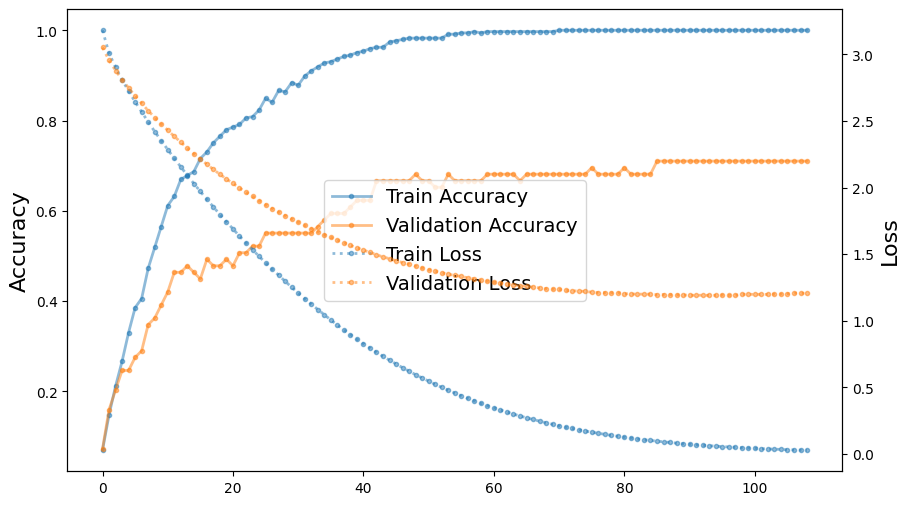

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['accuracy'], label='Train Accuracy', **kw)
l1, = ax.plot(ajuste.history['val_accuracy'], label='Validation Accuracy', **kw)

ax2 = ax.twinx()
ll0, = ax2.plot(ajuste.history['loss'], ls=':', color='C0', label='Train Loss', **kw)
ll1, = ax2.plot(ajuste.history['val_loss'], ls=':', color='C1', label='Validation Loss', **kw)

ax.set_ylabel('Accuracy', fontsize=16)
ax2.set_ylabel('Loss', fontsize=16)

ax.legend(handles=[l0, l1, ll0, ll1], loc='center', fontsize=14)
# plt.legend(loc=0)

In [36]:
model.evaluate(test_pca, test_label_tensor)

3/3 [==============================] - 0s 4ms/step - loss: 1.1910 - accuracy: 0.7101 - recall_1: 0.5797 - precision_1: 0.8163


[1.190985918045044, 0.7101449370384216, 0.5797101259231567, 0.8163265585899353]

In [37]:
# Calcular las predicciones y buscamos los casos con error
y_test = np.argmax(model.predict(test_pca), axis=1)

ierror = (y_test - test_label_num != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de validación sobre un total de {} imagenes'.format(np.sum(ierror), len(test_pca)))

3/3 [==============================] - 0s 2ms/step
Hay 20 errores en el conjunto de validación sobre un total de 69 imagenes


In [28]:
#backpropagation

# backpropagation, just one hidden layer
# lo hago con  matrices de pesos
# puedo tener tantos inputs como quiera
# puedo tener tantas neuronas ocultas como quiera
# puedo tener tantas neuronas de salida como quiera
# fuera de este codigo esta la decision que tomo segun el valor de salida de cada neurona de salida

def func_eval(fname, x):
    match fname:
        case "purelin":
            y = x
        case "logsig":
            y = 1.0 / ( 1.0 + math.exp(-x) )
        case "tansig":
            y = 2.0 / ( 1.0 + math.exp(-2.0*x) ) - 1.0
    return y

func_eval_vec = np.vectorize(func_eval)

def deriv_eval(fname, y):  #atencion que y es la entrada y=f( x )
    match fname:
        case "purelin":
            d = 1.0
        case "logsig":
            d = y*(1.0-y)
        case "tansig":
            d = 1.0 - y*y
    return d

deriv_eval_vec = np.vectorize(deriv_eval)

entrada = train_pca
salida = train_label_tensor

#print(salida.shape)

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

#print(Y)

filas_qty = len(X)
input_size = X.shape[1]   # 2 entradas
hidden_size = 64 # neuronas capa oculta
output_size = 23  # 1 neurona





# Paso las listas a numpy
#X = train_pca
#print(X.shape)

#Y = np.array(train_label_num).reshape(len(X),1)

#labels_np = np.array(labels_unicos_num).reshape(len(labels_unicos_num),1)

#print(labels_np.shape)

#print(Y.shape)


#filas_qty = len(X)
#input_size = X.shape[1]   # 97 entradas
#hidden_size = 64  # neuronas capa oculta
#output_size = labels_np.shape[0]  # 23 neuronas

#print(X.shape)
#print(Y.shape)
print('Red Neuronal')
print(f'Capa de entrada: {input_size}')
print(f'Capa oculta: {hidden_size}')
print(f'Capa de salida: {output_size}')



# defino las funciones de activacion de cada capa
hidden_FUNC = 'logsig'  # uso la logistica
output_FUNC = 'logsig'  # uso la tangente hiperbolica

# incializo los graficos
#grafico = perceptron_plot(X, np.array(salida), 0.0)


# Incializo las matrices de pesos azarosamente
# W1 son los pesos que van del input a la capa oculta
# W2 son los pesos que van de la capa oculta a la capa de salida
W1 = np.random.uniform(-0.5, 0.5, [hidden_size, input_size])
X01 = np.random.uniform(-0.5, 0.5, [hidden_size, 1] )
W2 = np.random.uniform(-0.5, 0.5, [output_size, hidden_size])
X02 = np.random.uniform(-0.5, 0.5, [output_size, 1] )

# Avanzo la red, forward
# para TODOS los X al mismo tiempo ! 
#  @ hace el producto de una matrix por un vector_columna
hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )



# Inicializo
epoch_limit = 6000    # para terminar si no converge
Error_umbral = 1.0e-8
learning_rate = 0.002
Error_last = 10    # lo debo poner algo dist a 0 la primera vez
epoch = 0

while ( math.fabs(Error_last-Error)>Error_umbral and (epoch < epoch_limit)):
    epoch += 1
    Error_last = Error

    # recorro siempre TODA la entrada
    for fila in range(filas_qty): #para cada input x_sub_fila del vector X
        # propagar el x hacia adelante
        hidden_estimulos = W1 @ X[fila:fila+1, :].T + X01
        hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
        output_estimulos = W2 @ hidden_salidas + X02
        output_salidas = func_eval_vec(output_FUNC, output_estimulos)

        # calculo los errores en la capa hidden y la capa output
        ErrorSalida = Y[fila:fila+1,:].T - output_salidas
        # output_delta es un solo numero
        output_delta = ErrorSalida * deriv_eval_vec(output_FUNC, output_salidas)
        # hidden_delta es un vector columna
        hidden_delta = deriv_eval_vec(hidden_FUNC, hidden_salidas)*(W2.T @ output_delta)

        # ya tengo los errores que comete cada capa
        # corregir matrices de pesos, voy hacia atras
        # backpropagation
        W1 = W1 + learning_rate * (hidden_delta @ X[fila:fila+1, :] )
        X01 = X01 + learning_rate * hidden_delta
        W2 = W2 + learning_rate * (output_delta @ hidden_salidas.T)
        X02 = X02 + learning_rate * output_delta

    # ya recalcule las matrices de pesos
    # ahora avanzo la red, feed-forward
    hidden_estimulos = W1 @ X.T + X01
    hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
    output_estimulos = W2 @ hidden_salidas + X02
    output_salidas = func_eval_vec(output_FUNC, output_estimulos)

    # calculo el error promedio general de TODOS los X
    Error= np.mean( (Y.T - output_salidas)**2 )


Red Neuronal
Capa de entrada: 97
Capa oculta: 64
Capa de salida: 23


In [29]:
#output_salidas_max_np = np.array(np.argmax(output_salidas, axis=0)).reshape(len(np.argmax(output_salidas, axis=0)),1)

#print(output_salidas_max_np)

#print(np.argmax(output_salidas, axis=0))

#print(np.array(train_label_num))

ierror = (np.argmax(output_salidas, axis=0) - np.array(train_label_num) != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de training sobre un total de {} imagenes'.format(np.sum(ierror), len(train_pca)))

print(f'Error medio cuadrático {Error} en training')

print(f'Accuracy {(len(train_pca) - np.sum(ierror))/len(train_pca)} en training')

Hay 5 errores en el conjunto de training sobre un total de 345 imagenes
Error medio cuadrático 0.0010890897208885822 en training
Accuracy 0.9855072463768116 en training


In [30]:
entrada = test_pca
salida = test_label_tensor

print(salida.shape)

# Paso las listas a numpy
X = np.array(entrada)
#Y = np.array(salida).reshape(len(X),1)
Y = np.array(salida)

#print(Y)

hidden_estimulos = W1 @ X.T + X01
hidden_salidas = func_eval_vec(hidden_FUNC, hidden_estimulos)
output_estimulos = W2 @ hidden_salidas + X02
output_salidas = func_eval_vec(output_FUNC, output_estimulos)

# calculo el error promedio general de TODOS los X
Error= np.mean( (Y.T - output_salidas)**2 )


(69, 23)


In [38]:
print(np.argmax(output_salidas, axis=0))

print(np.array(test_label_num))

ierror = (np.argmax(output_salidas, axis=0) - np.array(test_label_num) != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de testing sobre un total de {} imagenes'.format(np.sum(ierror), len(test_pca)))

print(f'Error medio cuadrático {Error} en testing')

print(f'Accuracy {(len(test_pca) - np.sum(ierror))/len(test_pca)} en testing')


[ 0  0  0  1 22  0  2  8  6 10  3  3  4  4  4 18  5  5  6  6  6  7 15 10
  2  8  8 18  9 12 16 10 10  7 11 11 12 12 12 13 13 13 14 15 11 15 10 15
 10 16 10 17 15 15 18 18 21 19 19 19 20 20 20 21 21 21 22 22 22]
[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15
 16 16 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22]
Hay 21 errores en el conjunto de testing sobre un total de 69 imagenes
Error medio cuadrático 0.02004959146012871 en testing
Accuracy 0.6956521739130435 en testing
